In [26]:
'''
Assignment 4: Employee Attrition Prediction
Dataset: HR Attrition
Link: https://raw.githubusercontent.com/krishnaik06/HR-Analytics/master/HR_comma_sep.csv
Task:
 Predict whether an employee will leave the company.
 Handle missing values.
 Encode categorical columns (salary, Department).
 Standardize all numeric features.
 Evaluate model using Precision, Recall, AUC.

'''

'\nAssignment 4: Employee Attrition Prediction\nDataset: HR Attrition\nLink: https://raw.githubusercontent.com/krishnaik06/HR-Analytics/master/HR_comma_sep.csv\nTask:\n\uf0b7 Predict whether an employee will leave the company.\n\uf0b7 Handle missing values.\n\uf0b7 Encode categorical columns (salary, Department).\n\uf0b7 Standardize all numeric features.\n\uf0b7 Evaluate model using Precision, Recall, AUC.\n\n'

In [27]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aiplanethub/Datasets/master/HR_comma_sep.csv')



In [28]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [29]:
df.isnull().sum()  ## check null value present or not

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [30]:
df['salary'].sample(10)

14958       low
3620     medium
7681     medium
98          low
10699    medium
13218    medium
13619    medium
1400     medium
2194        low
14621       low
Name: salary, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [32]:
le = LabelEncoder()

In [33]:
le.fit(df['Department'])

LabelEncoder()

In [34]:
df['Department'] = le.transform(df['Department'])  ## label the value of this column

In [35]:
oe =OrdinalEncoder(categories=[['low','medium','high']])

In [36]:
x = df['salary'].values

In [37]:
oe.fit(x.reshape(-1,1))

,categories,"[['low', 'medium', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [38]:
df['salary'] = oe.transform(x.reshape(-1,1)) ## odering of the value of this column

In [39]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0.0
1,0.80,0.86,5,262,6,0,1,0,7,1.0
2,0.11,0.88,7,272,4,0,1,0,7,1.0
3,0.72,0.87,5,223,5,0,1,0,7,0.0
4,0.37,0.52,2,159,3,0,1,0,7,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,0.0
14995,0.37,0.48,2,160,3,0,1,0,8,0.0
14996,0.37,0.53,2,143,3,0,1,0,8,0.0
14997,0.11,0.96,6,280,4,0,1,0,8,0.0


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(df['average_montly_hours'].values.reshape(-1,1))

,copy,True
,with_mean,True
,with_std,True


In [43]:
df['average_montly_hours'] = scaler.transform(df['average_montly_hours'].values.reshape(-1,1))  ## scalling of the numerical columnn

In [44]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,-0.882040,3,0,1,0,7,0.0
1,0.80,0.86,5,1.220423,6,0,1,0,7,1.0
2,0.11,0.88,7,1.420657,4,0,1,0,7,1.0
3,0.72,0.87,5,0.439508,5,0,1,0,7,0.0
4,0.37,0.52,2,-0.841993,3,0,1,0,7,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,-1.002181,3,0,1,0,8,0.0
14995,0.37,0.48,2,-0.821970,3,0,1,0,8,0.0
14996,0.37,0.53,2,-1.162368,3,0,1,0,8,0.0
14997,0.11,0.96,6,1.580845,4,0,1,0,8,0.0


In [45]:
df.iloc[:,0:8].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x = df.drop(['left'],axis=1).values

In [48]:
x

array([[0.38, 0.53, 2.  , ..., 0.  , 7.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 7.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 7.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 8.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 8.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 8.  , 0.  ]])

In [49]:
y = df['left'].values

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [51]:
x_train

array([[0.64, 0.79, 4.  , ..., 0.  , 7.  , 0.  ],
       [0.57, 0.9 , 5.  , ..., 0.  , 2.  , 0.  ],
       [0.09, 0.92, 7.  , ..., 0.  , 5.  , 0.  ],
       ...,
       [0.63, 0.5 , 4.  , ..., 0.  , 9.  , 0.  ],
       [0.11, 0.78, 7.  , ..., 0.  , 7.  , 0.  ],
       [0.72, 0.88, 3.  , ..., 0.  , 9.  , 0.  ]])

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression()

In [54]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
y_pred = lr.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,classification_report

In [57]:
accuracy_score(y_test,y_pred)

0.7793333333333333

In [58]:
mean_absolute_error(y_test,y_pred)

0.22066666666666668

In [62]:
import seaborn as sns

[[2075  191]
 [ 471  263]]


<Axes: >

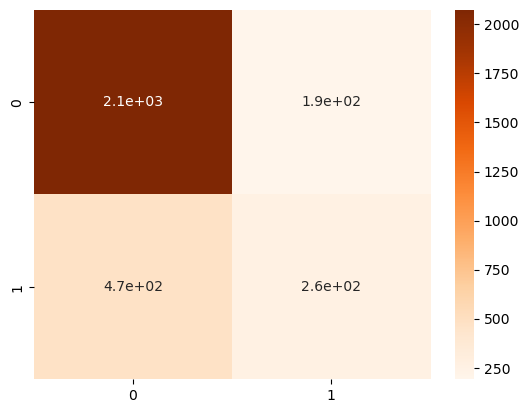

In [64]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,cmap='Oranges',annot=True,xticklabels=['0','1'],yticklabels=['0','1'])

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      2266
           1       0.58      0.36      0.44       734

    accuracy                           0.78      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.76      0.78      0.76      3000



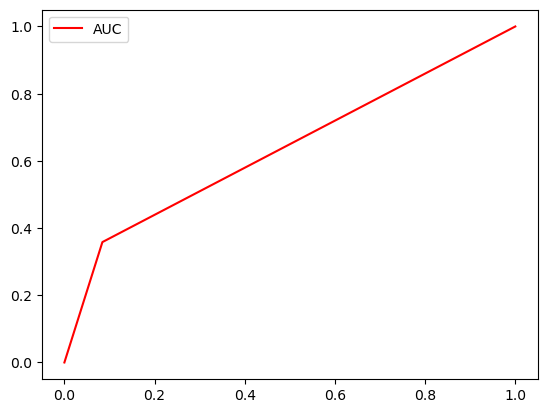

In [61]:
#print AUC ROC curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure()
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,color='red',label='AUC')
plt.legend(loc=2)
plt.show()